<a href="https://colab.research.google.com/github/santiagorg2401/pytorch_course_exercises/blob/main/01_PyTorch_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. PyTorch Workflow
Demonstrate an end-to-end PyTorch workflow from data loading to model inference and saving the model.

In [30]:
import torch
# Torch nn contains all building blocks for neural networks
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

torch.__version__

'2.0.1+cu118'

## 0. Prepare and load data

In [31]:
# Use linear regression to create a simple dataset
weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.02

X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10], len(X), len(y)

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 50,
 50)

In [32]:
# Split dataset into training and test sets
train_split = int(0.8*len(X))

X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

In [33]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Plots training data, test data and if available plot predictions.
  """
  plt.figure(figsize=(10,7))
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
  plt.scatter(test_data, test_labels, c="g", s=4, label="Test data")

  if predictions is not None:
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  plt.legend()
  plt.grid()

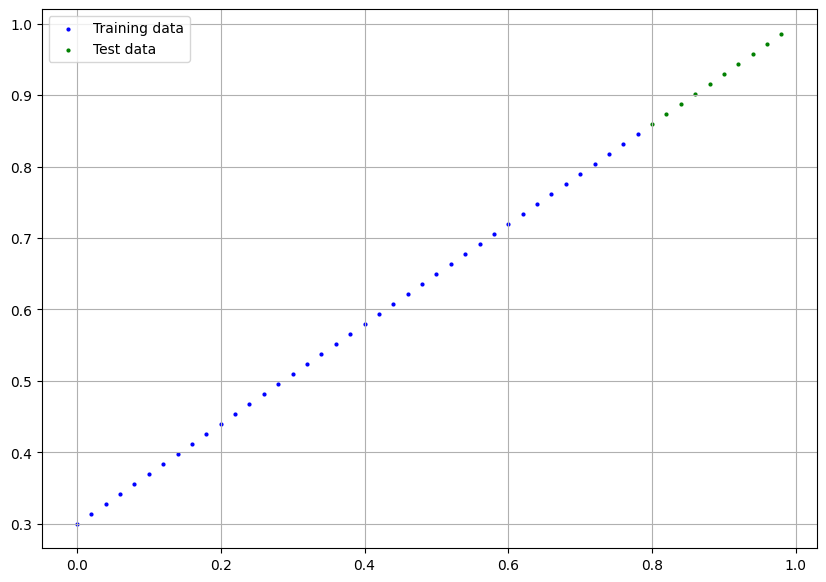

In [34]:
plot_predictions()

## 1. `model_0`
Build the first PyTorch linear regression model.

In [35]:
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    # Initialize  model parameters
    self.weights = nn.Parameter(torch.randn(1, requires_grad=True,
                                            dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1, requires_grad=True,
                                         dtype=torch.float))

  # Forward method to define the computation in the model
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.weights * x + self.bias

In [36]:
# Create a random seed
torch.manual_seed(42)

# Instance the model
model_0 = LinearRegressionModel()

# Check out parameters
list(model_0.parameters()), model_0.state_dict()

([Parameter containing:
  tensor([0.3367], requires_grad=True),
  Parameter containing:
  tensor([0.1288], requires_grad=True)],
 OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))]))

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

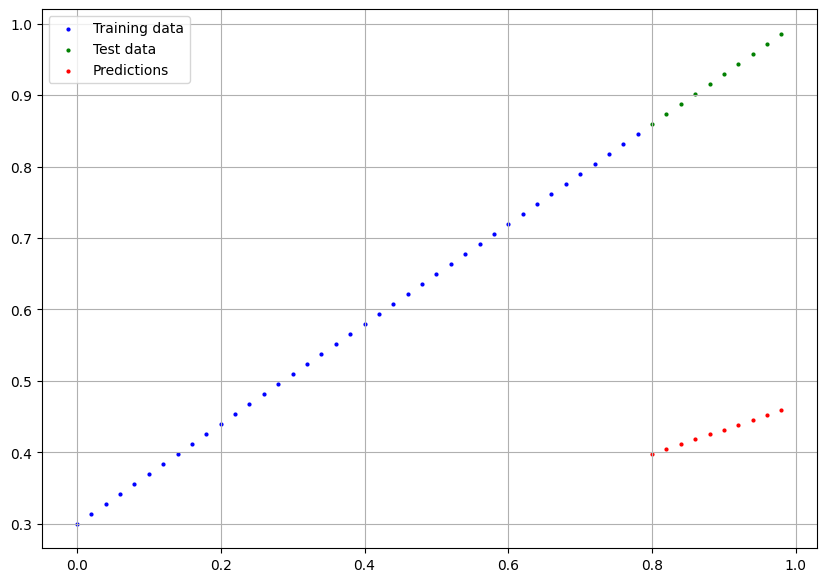

In [37]:
# Make predictions
with torch.inference_mode():
  y_preds = model_0(X_test)

plot_predictions(predictions=y_preds)
y_preds

In [38]:
epochs = 1

# Setup a loss function and an optimizer
loss_fn = nn.L1Loss()

optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=1e-2)

for epoch in range(epochs):
  # Set all parameters that requires gradients to require gradients
  model_0.train()

  # Forward pass
  y_pred = model_0(X_train)

  # Calculate the loss function
  loss = loss_fn(y_pred, y_train)

  # Optimizer. Reset gradients, calculate back propagation and step optimizer.
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  # Turn off gradient tracking
  model_0.eval()

model_0.state_dict()

OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])

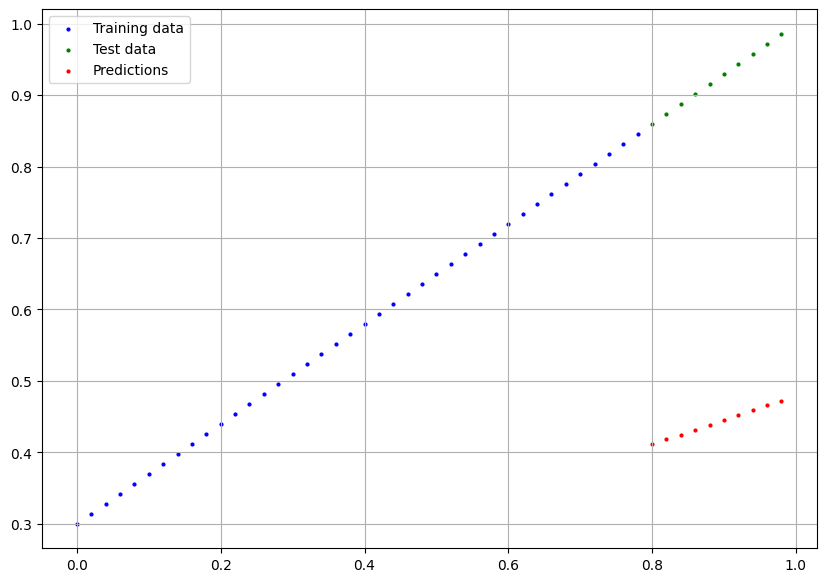

In [39]:
# Make predictions
with torch.inference_mode():
  y_preds = model_0(X_test)

plot_predictions(predictions=y_preds)

In [40]:
EPOCHS = 200; LOG_STEP = 10; SEED = 42

# Initialize model
torch.manual_seed(SEED)
model_0 = LinearRegressionModel()

# Create experiment trackers
epoch_count=[]
loss_values=[]
test_loss_values=[]

# Setup a loss function and an optimizer
loss_fn = nn.L1Loss()

optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=1e-2)

for epoch in range(EPOCHS):
  # Set all parameters that requires gradients to require gradients
  model_0.train()

  # Forward pass
  y_pred = model_0(X_train)

  # Calculate the loss function
  loss = loss_fn(y_pred, y_train)

  # Optimizer. Reset gradients, calculate back propagation and step optimizer.
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  # Turn off gradient tracking
  model_0.eval()
  with torch.inference_mode():
    test_pred = model_0(X_test)
    test_loss = loss_fn(test_pred, y_test)

  # Log experiment data
  if epoch % LOG_STEP == 0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)

    print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")
    print(model_0.state_dict())

Epoch: 0 | Loss: 0.31288138031959534 | Test loss: 0.48106518387794495
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
Epoch: 10 | Loss: 0.1976713240146637 | Test loss: 0.3463551998138428
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
Epoch: 20 | Loss: 0.08908725529909134 | Test loss: 0.21729660034179688
OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([0.3333]))])
Epoch: 30 | Loss: 0.053148526698350906 | Test loss: 0.14464017748832703
OrderedDict([('weights', tensor([0.4512])), ('bias', tensor([0.3768]))])
Epoch: 40 | Loss: 0.04543796554207802 | Test loss: 0.11360953003168106
OrderedDict([('weights', tensor([0.4748])), ('bias', tensor([0.3868]))])
Epoch: 50 | Loss: 0.04167863354086876 | Test loss: 0.09919948130846024
OrderedDict([('weights', tensor([0.4938])), ('bias', tensor([0.3843]))])
Epoch: 60 | Loss: 0.03818932920694351 | Test loss: 0.08886633068323135
OrderedDict([('weights', tensor([0.5116])), ('bias', tensor([0.3788

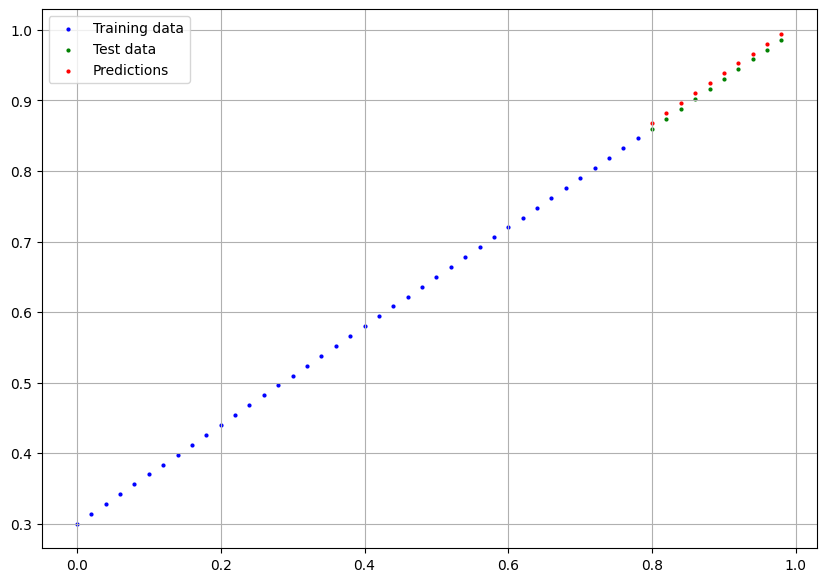

In [41]:
# Make predictions
with torch.inference_mode():
  y_preds = model_0(X_test)

plot_predictions(predictions=y_preds)

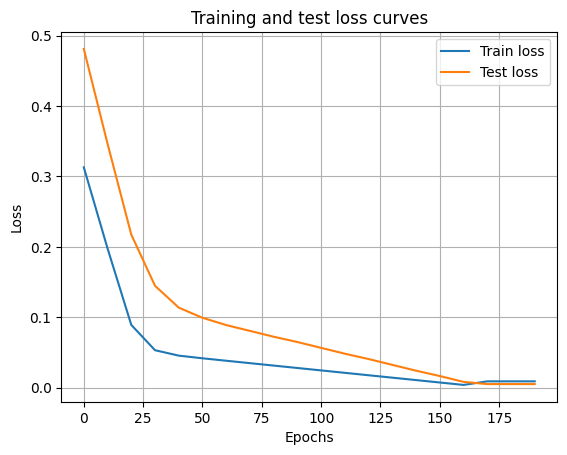

In [42]:
# Plot loss curves
plt.plot(epoch_count, torch.tensor(loss_values).numpy(), label="Train loss")
plt.plot(epoch_count, torch.tensor(test_loss_values).numpy(), label="Test loss")
plt.title("Training and test loss curves")
plt.legend(); plt.ylabel("Loss"); plt.xlabel("Epochs"); plt.grid()

## 2. Save and load the model
There are three main methods to save and load models in PyTorch

1. `torch.save()` - saves model in Pickle format
2. `torch.load()` - loads a saved PyTorch object
3. `torch.nn.Module.load_state_dict()` - loads a PyToch model state dictionary

In [43]:
from pathlib import Path

# Create models directory
MODEL_PATH = Path("models/01_PyTorch_workflow")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# Create model save path
MODEL_NAME = "model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# Save the model state dict
torch.save(model_0.state_dict(), MODEL_SAVE_PATH)

In [44]:
# Load the saved model
model_0_loaded = LinearRegressionModel()
model_0_loaded.load_state_dict(torch.load(MODEL_SAVE_PATH))
model_0_loaded.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [45]:
# Make inferences on loaded and native model
model_0_loaded.eval()
model_0.eval()

with torch.inference_mode():
  loaded_model_preds = model_0_loaded(X_test)
  y_preds = model_0(X_test)

y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

## 3. `model_1` Setting up a complete pipeline

### 0. Import libraries

In [46]:
import torch
import numpy as np
import matplotlib.pyplot as plt

from torch import nn
from pathlib import Path
from sklearn.model_selection import train_test_split

print(f"Using PyTorch version: {torch.__version__}")

Using PyTorch version: 2.0.1+cu118


### 1. Create device-agnostic code

In [47]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cuda


### 2. Prepare and load data
Linear regression synthetic data.

In [48]:
WEIGHT = 0.7; BIAS = 0.3
START = 0; END = 1; STEP = 2e-2
TEST_SIZE = 0.2

# Create features and labels tensors
X = torch.arange(START, END, STEP).unsqueeze(dim=1)
y = WEIGHT * X + BIAS

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=TEST_SIZE,
                                                    shuffle=False)

# Set data to target device
X_train = X_train.to(device); X_test = X_test.to(device)
y_train = y_train.to(device); y_test = y_test.to(device)

m = f"Dataset size\nX: {X.shape}\ny: {y.shape}\nTest size: {int(TEST_SIZE*100)}%" \
    f"\n\nSplit shapes\nX_train: {X_train.shape}\nX_test: {X_test.shape}" \
    f"\ny_train: {y_train.shape}\ny_test: {y_test.shape}"
print(m)

Dataset size
X: torch.Size([50, 1])
y: torch.Size([50, 1])
Test size: 20%

Split shapes
X_train: torch.Size([40, 1])
X_test: torch.Size([10, 1])
y_train: torch.Size([40, 1])
y_test: torch.Size([10, 1])


In [49]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Plots training data, test data and if available plot predictions.
  """
  # Set tensors to CPU
  train_data = train_data.to("cpu"); test_data = X_test.to("cpu")
  train_labels = train_labels.to("cpu"); test_labels = y_test.to("cpu")

  plt.figure(figsize=(10,7))
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
  plt.scatter(test_data, test_labels, c="g", s=4, label="Test data")

  if predictions is not None:
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  plt.legend()
  plt.grid()

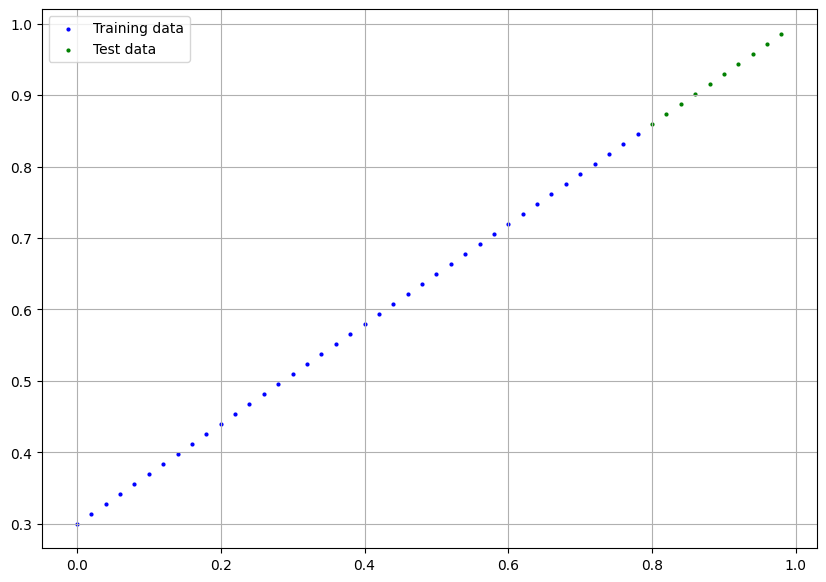

In [50]:
plot_predictions(X_train, y_train, X_test, y_test)

### 3. Build model class

In [51]:
class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    # Initiate model parameters
    self.linear_layer = nn.Linear(in_features = 1,
                                  out_features = 1)

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)

### 4. Setup training and testing loop

In [52]:
EPOCHS = 200; LOG_STEP = 10; SEED = 42; LEARNING_RATE = 1e-2

# Initialize model
torch.manual_seed(SEED)
model_1 = LinearRegressionModelV2()
model_1.to(device)

# Create experiment trackers
epoch_count = []
loss_values = []
test_loss_values = []

# Setup a loss functions and an optimizer
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr = LEARNING_RATE)

for epoch in range(EPOCHS):
  # Training loop
  model_1.train()
  y_pred = model_1(X_train)
  loss = loss_fn(y_pred, y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  # Testing loop
  model_1.eval()
  with torch.inference_mode():
    test_pred = model_1(X_test)
    test_loss = loss_fn(test_pred, y_test)

  # Log experiment data
  if epoch % LOG_STEP == 0 or epoch == EPOCHS - 1:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)

    print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")

Epoch: 0 | Loss: 0.5551779866218567 | Test loss: 0.5739762187004089
Epoch: 10 | Loss: 0.439968079328537 | Test loss: 0.4392664134502411
Epoch: 20 | Loss: 0.3247582018375397 | Test loss: 0.30455657839775085
Epoch: 30 | Loss: 0.20954833924770355 | Test loss: 0.16984669864177704
Epoch: 40 | Loss: 0.09433845430612564 | Test loss: 0.03513690456748009
Epoch: 50 | Loss: 0.023886388167738914 | Test loss: 0.04784907028079033
Epoch: 60 | Loss: 0.019956795498728752 | Test loss: 0.045803118497133255
Epoch: 70 | Loss: 0.016517987474799156 | Test loss: 0.037530567497015
Epoch: 80 | Loss: 0.013089174404740334 | Test loss: 0.02994490973651409
Epoch: 90 | Loss: 0.009653178043663502 | Test loss: 0.02167237363755703
Epoch: 100 | Loss: 0.006215683650225401 | Test loss: 0.014086711220443249
Epoch: 110 | Loss: 0.00278724217787385 | Test loss: 0.005814164876937866
Epoch: 120 | Loss: 0.0012645035749301314 | Test loss: 0.013801801018416882
Epoch: 130 | Loss: 0.0012645035749301314 | Test loss: 0.013801801018416

### 5. Make predictions

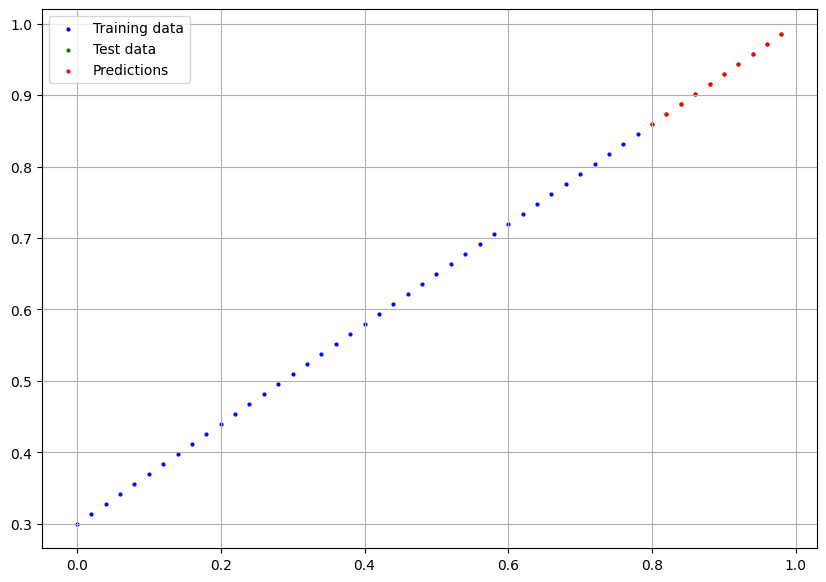

In [53]:
model_1.eval()
with torch.inference_mode():
  y_preds = model_1(X_test)

plot_predictions(predictions=y_preds.cpu())

### 6. Save model

In [54]:
# Create models directory
MODEL_PATH = Path("models/01_PyTorch_workflow")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# Create model save path
MODEL_NAME = "model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# Save the model state dict
torch.save(model_1.state_dict(), MODEL_SAVE_PATH)

In [61]:
# Load model
model_1_loaded = LinearRegressionModelV2()
model_1_loaded.load_state_dict(torch.load(MODEL_SAVE_PATH))
model_1_loaded.to(device)

LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [62]:
# Make predictions on native and loaded model
model_1.eval()
model_1_loaded.eval()

with torch.inference_mode():
  y_preds = model_1(X_test)
  loaded_preds = model_1_loaded(X_test)

y_preds == loaded_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')